### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
%matplotlib inline

from pprint import pprint

import tensorflow as tf

from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict,GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score


pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

import warnings
warnings.filterwarnings("ignore")

np.random.seed(5)

In [2]:
trainset = pd.read_csv('traincleaned.csv')
testset = pd.read_csv('testcleaned.csv')

In [3]:
trainset.shape

(1562, 9)

In [4]:
trainset.head()

,population,poverty_rate,pct_asian,pct_adults_bachelors_or_higher,death_rate_per_1k,pct_adult_obesity,pct_adults_with_high_school_diploma,pct_physical_inactivity,gross_rent
0,0.023278,0.163225,0.215669,0.415881,0.453269,0.515625,0.452178,0.733696,577.0
1,0.064244,0.301803,0.057134,1.000000,0.000000,0.218750,0.120183,0.030797,844.0
2,0.172656,0.382985,0.180185,0.477163,0.530341,0.442708,0.608543,0.429348,700.0
3,0.054635,0.537368,0.164462,0.464484,0.530151,0.229167,0.401060,0.487319,592.0
4,0.022019,0.321482,0.521310,0.414058,0.795009,0.588542,0.542461,0.726449,444.0


In [5]:
trainset.describe()

,population,poverty_rate,pct_asian,pct_adults_bachelors_or_higher,death_rate_per_1k,pct_adult_obesity,pct_adults_with_high_school_diploma,pct_physical_inactivity,gross_rent
count,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,0.315221,0.470485,0.325477,0.420082,0.498212,0.489837,0.501116,0.498382,690.869398
std,0.337841,0.206988,0.322053,0.244388,0.187483,0.213047,0.185760,0.190813,161.102958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,351.000000
25%,0.065720,0.312640,0.091503,0.239495,0.375000,0.375000,0.379902,0.375000,578.000000
50%,0.161420,0.437152,0.202047,0.362974,0.497575,0.494792,0.516032,0.512681,650.000000
75%,0.439432,0.587584,0.454902,0.543697,0.625000,0.625000,0.633171,0.625000,773.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1067.375000


In [6]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 9 columns):
population                             1562 non-null float64
poverty_rate                           1562 non-null float64
pct_asian                              1562 non-null float64
pct_adults_bachelors_or_higher         1562 non-null float64
death_rate_per_1k                      1562 non-null float64
pct_adult_obesity                      1562 non-null float64
pct_adults_with_high_school_diploma    1562 non-null float64
pct_physical_inactivity                1562 non-null float64
gross_rent                             1562 non-null float64
dtypes: float64(9)
memory usage: 110.0 KB


In [7]:
X = trainset.iloc[:,0:8]
y = trainset.iloc[:,8]

In [8]:
X.shape, y.shape

((1562, 8), (1562,))

In [9]:
X = np.asarray(X)

In [10]:
y = np.asarray(y)

In [11]:
testset = np.asarray(testset)

In [12]:
testset

array([[0.12841254, 0.05338035, 0.39032981, ..., 0.73768167, 0.19027042,
        0.52611141],
       [0.53829054, 0.5042044 , 0.8243051 , ..., 0.03530985, 0.92579809,
        0.32376536],
       [0.20147311, 0.21404344, 0.72501092, ..., 0.46018719, 0.27980005,
        0.47108826],
       ...,
       [0.06632096, 0.21715796, 0.10569026, ..., 0.        , 1.        ,
        0.        ],
       [0.06772453, 0.32619313, 0.44442879, ..., 0.54559827, 0.5963895 ,
        0.42888532],
       [0.00294918, 0.09121167, 0.11712994, ..., 0.49434356, 0.49655802,
        0.17502657]])

### Perform Train Test Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [14]:
X_train.shape, y_train.shape

((1249, 8), (1249,))

In [15]:
X_test.shape, y_test.shape

((313, 8), (313,))

### ANN Test Model

In [16]:
model = tf.keras.models.Sequential()

In [17]:
model.add(tf.keras.layers.Dense(units=24,activation='relu',input_dim=8))

In [18]:
model.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [19]:
model.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                216       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(X_train,y_train,batch_size=12,epochs=100)

Train on 1249 samples
Epoch 1/100
1249/1249 [==============================] - 0s 137us/sample - loss: 22753.3804 - mse: 22753.3867
Epoch 2/100
1249/1249 [==============================] - 0s 120us/sample - loss: 22434.1211 - mse: 22434.1211
Epoch 3/100
1249/1249 [==============================] - 0s 113us/sample - loss: 22117.7743 - mse: 22117.7695
Epoch 4/100
1249/1249 [==============================] - 0s 112us/sample - loss: 21824.6447 - mse: 21824.6387
Epoch 5/100
1249/1249 [==============================] - 0s 128us/sample - loss: 21532.1740 - mse: 21532.1816
Epoch 6/100
1249/1249 [==============================] - 0s 120us/sample - loss: 21242.9363 - mse: 21242.9375
Epoch 7/100
1249/1249 [==============================] - 0s 120us/sample - loss: 20969.4579 - mse: 20969.4551
Epoch 8/100
1249/1249 [==============================] - 0s 120us/sample - loss: 20702.9369 - mse: 20702.9355
Epoch 9/100
1249/1249 [==============================] - 0s 112us/sample - loss: 20439.3080 - mse:

1249/1249 [==============================] - 0s 120us/sample - loss: 14018.1863 - mse: 14018.1846
Epoch 75/100
1249/1249 [==============================] - 0s 116us/sample - loss: 13970.6841 - mse: 13970.6836
Epoch 76/100
1249/1249 [==============================] - 0s 112us/sample - loss: 13913.4791 - mse: 13913.4795
Epoch 77/100
1249/1249 [==============================] - 0s 120us/sample - loss: 13868.2345 - mse: 13868.2354
Epoch 78/100
1249/1249 [==============================] - 0s 120us/sample - loss: 13831.8354 - mse: 13831.8379
Epoch 79/100
1249/1249 [==============================] - 0s 112us/sample - loss: 13784.4851 - mse: 13784.4863
Epoch 80/100
1249/1249 [==============================] - 0s 144us/sample - loss: 13734.9060 - mse: 13734.9062
Epoch 81/100
1249/1249 [==============================] - 0s 112us/sample - loss: 13696.6871 - mse: 13696.6904
Epoch 82/100
1249/1249 [==============================] - 0s 112us/sample - loss: 13657.0888 - mse: 13657.0889
Epoch 83/100
1

In [22]:
model.evaluate(X_test,y_test,batch_size=12)

313/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[19744.694725548496, 19744.695]

In [25]:
y_predict = model.predict(X_test,batch_size=12)

Text(0, 0.5, 'Predictions')

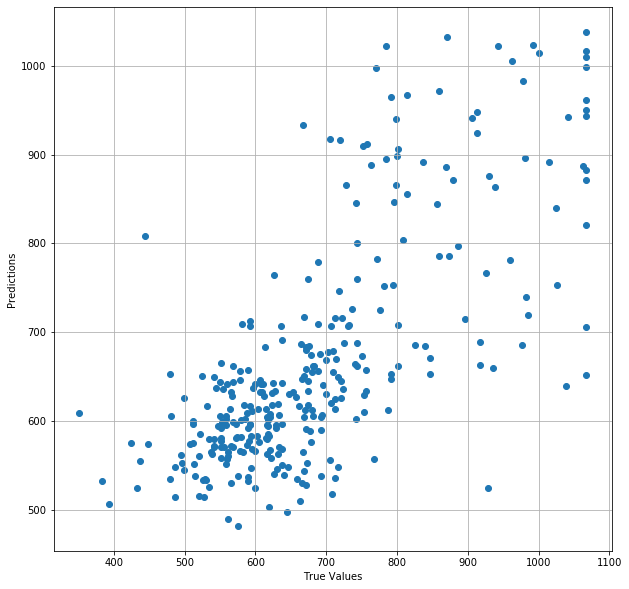

In [26]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_predict)
plt.grid()
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [27]:
y_predict

array([[ 557.94446],
       [ 661.72186],
       [ 647.35455],
       [ 803.45074],
       [ 625.11346],
       [ 551.46735],
       [ 653.45404],
       [ 766.6588 ],
       [ 808.5363 ],
       [ 532.9101 ],
       [ 641.73193],
       [ 601.26654],
       [ 595.44415],
       [ 609.1479 ],
       [ 630.8016 ],
       [ 481.72934],
       [ 574.9814 ],
       [ 865.38116],
       [ 657.25006],
       [ 573.206  ],
       [ 632.83344],
       [ 607.5542 ],
       [ 677.5925 ],
       [ 536.4975 ],
       [ 760.0385 ],
       [ 618.17377],
       [ 640.795  ],
       [ 620.7528 ],
       [ 705.78973],
       [ 565.25085],
       [ 645.83575],
       [ 570.8397 ],
       [ 560.9438 ],
       [ 533.7334 ],
       [ 752.1352 ],
       [ 641.73975],
       [ 582.44977],
       [ 558.3639 ],
       [ 524.73865],
       [ 619.29767],
       [ 604.8411 ],
       [ 947.57605],
       [ 580.7276 ],
       [ 600.80676],
       [ 626.1363 ],
       [ 708.2055 ],
       [ 924.3861 ],
       [ 560.

### Model Evaluation

In [30]:
#r2_score(X_test,y_test)  #Returns R2 score

### Perform Cross-Validation

Cross-validation is another method to estimate the skill of a method on unseen data. Like using a train-test split.

Cross-validation systematically creates and evaluates multiple models on multiple subsets of the dataset.

This, in turn, provides a population of performance measures.

- We can calculate the mean of these measures to get an idea of how well the procedure performs on average.
- We can calculate the standard deviation of these measures to get an idea of how much the skill of the procedure is expected to vary in practice.

The train-test split and k-fold cross validation are called resampling methods. Resampling methods are statistical procedures for sampling a dataset and estimating an unknown quantity.

In the case of applied machine learning, we are interested in estimating the skill of a machine learning procedure on unseen data. More specifically, the skill of the predictions made by a machine learning procedure.

Once we have the estimated skill, we are finished with the resampling method.

- If you are using a train-test split, that means you can discard the split datasets and the trained model.
- If you are using k-fold cross-validation, that means you can throw away all of the trained models.

They have served their purpose and are no longer needed.

You are now ready to finalize your model.

When choosing a value for k each fold(group) should be large enough to be **representative** of the model (commonly k=10 or k=5) and small enough to be computed in a reasonable amount of time. Depending on the dataset size, different k values can sometimes be experimented with. As a general rule, as k increases, bias decreases and variance increases.

But the purpose of cross-validation is not to come up with our final model. We don't use these 5 instances of our trained model to do any real prediction. For that we want to use all the data we have to come up with the best model possible. The purpose of cross-validation is model checking, not model building.

In [ ]:
r2score = cross_val_score(rfFit,X,y,cv=5,n_jobs=-1,scoring='r2')

In [ ]:
r2score

In [ ]:
r2score.mean()

In [ ]:
r2score.std()

### Using RandomGridSearch to tune hyperparameters

In [ ]:
base = RandomForestRegressor(n_estimators=10,criterion='mae',bootstrap=True, max_features='auto',n_jobs=-1,random_state=5)

In [ ]:
params = {'n_estimators' : [150,200],
          'max_depth':[8,16,24],
          'min_samples_leaf': [2, 4, 6]
         }

pprint(params)

In [ ]:
random = RandomizedSearchCV(base,params,n_iter=100,scoring='r2',n_jobs=-1,cv=4,verbose=1,random_state=5)

In [ ]:
random.fit(X,y)

In [ ]:
random.best_params_

### Using GridSearchCV to tune hyperparameters

In [ ]:
base = RandomForestRegressor(n_estimators=10,criterion='mae',bootstrap=True, max_features='auto',min_samples_leaf=2,n_jobs=-1,random_state=5)

In [ ]:
params = {'n_estimators' : [150,200],
          'max_depth':[8,16,24],
          'min_samples_split': [2, 4, 6]
         }

pprint(params)

In [ ]:
grid = GridSearchCV(base,params,scoring='r2',n_jobs=-1,cv=3,verbose=1,return_train_score=True)

In [ ]:
grid.fit(X,y)

In [ ]:
grid.best_params_

In [ ]:
#Best hyperparams: 
#bootstrap = True
#n_estimators = 150
#max_depth = 16
#max_features = 'auto'
#min_samples_leaf = 2
#min_samples_split = 2

### Select best model and train with all trainset data

In [31]:
ann = tf.keras.models.Sequential()

In [32]:
ann.add(tf.keras.layers.Dense(units=24,activation='relu',input_dim=8))
ann.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [33]:
ann.compile(optimizer='adam',loss='mse',metrics=['mse'])

In [34]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 24)                216       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [35]:
ann.fit(X,y,batch_size=12,epochs=150)

Train on 1562 samples
Epoch 1/150
1562/1562 [==============================] - 1s 531us/sample - loss: 500901.7018 - mse: 500901.6875
Epoch 2/150
1562/1562 [==============================] - 0s 122us/sample - loss: 490987.0701 - mse: 490987.0938
Epoch 3/150
1562/1562 [==============================] - 0s 128us/sample - loss: 473493.7736 - mse: 473493.8438
Epoch 4/150
1562/1562 [==============================] - 0s 134us/sample - loss: 449269.7692 - mse: 449269.8125
Epoch 5/150
1562/1562 [==============================] - 0s 115us/sample - loss: 419461.0652 - mse: 419461.0938
Epoch 6/150
1562/1562 [==============================] - 0s 115us/sample - loss: 385251.2929 - mse: 385251.3125
Epoch 7/150
1562/1562 [==============================] - 0s 115us/sample - loss: 348200.8836 - mse: 348200.9062
Epoch 8/150
1562/1562 [==============================] - 0s 124us/sample - loss: 309650.9905 - mse: 309651.0312
Epoch 9/150
1562/1562 [==============================] - 0s 113us/sample - loss: 2

1562/1562 [==============================] - 0s 109us/sample - loss: 14780.1296 - mse: 14780.1309
Epoch 75/150
1562/1562 [==============================] - 0s 109us/sample - loss: 14691.0881 - mse: 14691.0830
Epoch 76/150
1562/1562 [==============================] - 0s 115us/sample - loss: 14614.7944 - mse: 14614.7949
Epoch 77/150
1562/1562 [==============================] - 0s 109us/sample - loss: 14518.8217 - mse: 14518.8184
Epoch 78/150
1562/1562 [==============================] - 0s 109us/sample - loss: 14436.5197 - mse: 14436.5225
Epoch 79/150
1562/1562 [==============================] - 0s 122us/sample - loss: 14355.9626 - mse: 14355.9639
Epoch 80/150
1562/1562 [==============================] - 0s 115us/sample - loss: 14271.7966 - mse: 14271.7979
Epoch 81/150
1562/1562 [==============================] - 0s 109us/sample - loss: 14202.3842 - mse: 14202.3857
Epoch 82/150
1562/1562 [==============================] - 0s 109us/sample - loss: 14128.1763 - mse: 14128.1768
Epoch 83/150
1

1562/1562 [==============================] - 0s 131us/sample - loss: 11468.8649 - mse: 11468.8643
Epoch 148/150
1562/1562 [==============================] - 0s 115us/sample - loss: 11454.0803 - mse: 11454.0830
Epoch 149/150
1562/1562 [==============================] - 0s 130us/sample - loss: 11433.1803 - mse: 11433.1797
Epoch 150/150
1562/1562 [==============================] - 0s 132us/sample - loss: 11403.9355 - mse: 11403.9385


In [36]:
y_predict = ann.predict(testset,batch_size=12,verbose=1)

1576/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [37]:
y_predict.astype(int)

array([[579],
       [838],
       [832],
       ...,
       [588],
       [660],
       [787]])

In [38]:
annresult = pd.DataFrame(y_predict.astype(int), columns=['gross_rent'])

In [39]:
annresult

,gross_rent
0,579
1,838
2,832
3,819
4,708
5,688
6,608
7,769
8,851
9,667


In [40]:
#annresult.to_csv("ann.csv",index_label=['row_id'])